In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
!ls '/gdrive/My Drive/datasets/cats_and_dogs_small'

test  train  validation


In [ ]:
import os 
import shutil

base_dir = '/gdrive/My Drive/datasets/cats_and_dogs_small'
base_root_dir = '/gdrive/My Drive/datasets/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=20,
                                                    target_size=(150,150),
                                                    class_mode='binary')

In [ ]:
image_batch, label_batch = next(train_generator)

In [ ]:
plt.imshow(image_batch[0])
plt.title(label_batch[0])
plt.show()

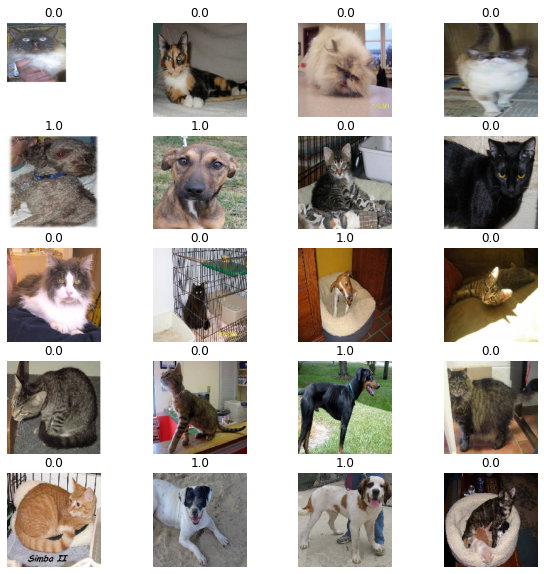

In [ ]:
plt.figure(figsize=(10,10))

for n in range(20):
  plt.subplot(5, 4, n+1)
  plt.imshow(image_batch[n])
  plt.title(label_batch[n])
  plt.axis('off')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=20,
                                                    target_size=(150,150),
                                                    class_mode='binary')
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  batch_size=20,
                                                  target_size=(150,150),
                                                  class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                  batch_size=20,
                                                  target_size=(150,150),
                                                  class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

58892288/58889256 [==============================] - 3s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential() 
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(model.trainable_weights)

30

In [ ]:
conv_base.trainable = False

In [ ]:
len(model.trainable_weights)

4

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 1232s 12s/step - loss: 0.4783 - accuracy: 0.7965 - val_loss: 0.4328 - val_accuracy: 0.8490
Epoch 2/30
100/100 [==============================] - 20s 205ms/step - loss: 0.3354 - accuracy: 0.8795 - val_loss: 0.6651 - val_accuracy: 0.8600
Epoch 3/30
100/100 [==============================] - 20s 204ms/step - loss: 0.2757 - accuracy: 0.9020 - val_loss: 0.2843 - val_accuracy: 0.8860
Epoch 4/30
100/100 [==============================] - 20s 204ms/step - loss: 0.2381 - accuracy: 0.9180 - val_loss: 0.2472 - val_accuracy: 0.8850
Epoch 5/30
100/100 [==============================] - 20s 203ms/step - loss: 0.2121 - accuracy: 0.9300 - val_loss: 0.3954 - val_accuracy: 0.8910
Epoch 6/30
100/100 [==============================] - 20s 204ms/step - loss: 0.1914 - accuracy: 0.9395 - val_loss: 0.4065 - val_accuracy: 0.8960
Epoch 7/30
100/100 [==============================] - 20s 204ms/step - loss: 0.1743 - accuracy: 0.9435 - val_loss: 0.1428 - val_ac

In [ ]:
model.evaluate_generator(test_generator, steps=50)

[0.1383286416530609, 0.8849999904632568]

In [ ]:
model.save(base_dir, 'cats_and_dogs_small3.h5')